In [1]:
# This is a notebook containing exploratory data analysis of the articles available through the IWMS API
__author__ = 'Alvin Leung'
__version__ = 'v1.0'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data collected from API
df = pd.read_csv('iwms_all_03-04-2024_1326.csv', index_col = 'publicationID')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df[df['language'] == 'en']
df.head()

,content,companies,regions,countries,issuers,distributionScopes,sectors,pdfname,publicationTitle,description,publicationDateTime,publicationSubTitle,language,variant,publicationTypeName,distributionDate,assetClasses,isins,loadDateTime
publicationID,,,,,,,,,,,,,,,,,,,
3c0649c5-a606-4f1f-9155-52270119149d,JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0...,ING Groep,Europe and CIS_European Union_EMU (European Mo...,NLD,NaN,Bahrain_Chile_Dubai International Financial Ce...,Finance,123fb89c-d6ff-425c-8e78-7950e060ead6,"ING Groep (Maintain Buy, Price/Target: EUR 11....",SOFTER Q4 NII & WEAKER 2024 NII OUTLOOK; LARGE...,2024-02-08T15:30:00Z,Softer Q4 NII and weaker 2024 NII outlook; lar...,en,"For distribution in BRN, CHI, DIFC, FRA, GER, ...",Baer Insight Equity Research,2024-02-08T15:30:00Z,Equities,NL0011821202,2024-03-10T08:24:09.695162Z
63a7cdd8-17f1-4431-942f-7b5af6ce16aa,JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0...,Orsted,Europe and CIS_European Union_Nordic Countries...,DNK,NaN,Bahrain_Chile_Dubai International Financial Ce...,Utilities,c416a022-fab7-4a03-a805-59b2245128ef,"Orsted (Maintain Buy, Price/Target: DKK 378.60...",- Orsted's highly anticipated new strategic pl...,2024-02-08T15:33:00Z,The reset - broadly as expected,en,"For distribution in BRN, CHI, DIFC, FRA, GER, ...",Baer Insight Equity Research,2024-02-08T15:33:00Z,Equities,DK0060094928,2024-03-10T08:24:09.695162Z
b3e8db38-a62e-4c88-9758-f98cf1abebb2,JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0...,Vinci,Europe and CIS_European Union_EMU (European Mo...,FRA,NaN,Bahrain_Chile_Dubai International Financial Ce...,Industrial Services,504a1b70-06b6-49f8-84d1-4b6288449599,"Vinci (Maintain Buy, Price/Target: EUR 117.66/...","Solid 2023 results, solid 2024 guidance\n\n- V...",2024-02-08T15:32:00Z,"Solid 2023 results, solid 2024 guidance",en,"For distribution in BRN, CHI, DIFC, FRA, GER, ...",Baer Insight Equity Research,2024-02-08T15:32:00Z,Equities,FR0000125486,2024-03-10T08:24:09.695162Z
d5833f12-51ce-44f0-b9cd-a33b7f2b1ecc,JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0...,Danske Bank,Europe and CIS_European Union_Nordic Countries...,DNK,NaN,Bahrain_Chile_Dubai International Financial Ce...,Finance,8c5a6f15-f2b8-4e17-9bac-928c4078ef72,"Danske Bank (Maintain Buy, Price/Target: DKK 1...","Q4 IN-LINE, ROBUST GUIDANCE; LARGE DIVIDENDS A...",2024-02-08T15:52:00Z,"Q4 in-line, robust guidance; large dividends a...",en,"For distribution in BRN, CHI, DIFC, FRA, GER, ...",Baer Insight Equity Research,2024-02-08T15:52:00Z,Equities,DK0010274414,2024-03-10T08:24:09.695162Z
ccc30d30-745d-479f-91d6-615c2a46786b,JVBERi0xLjcNCiW1tbW1DQoxIDAgb2JqDQo8PC9UeXBlL0...,Daikin Industries,Developed Markets_G20_OECD_G7_Pacific_Far East...,JPN_CHN_IDN,China_Indonesia,Bahrain_Chile_Dubai International Financial Ce...,Producer Manufacturing_Miscellaneous,7bf11bf7-8f8f-454e-bca3-210543bf7cb0,The Wire – Asia Bell,top stories:\n- NEW: The week that was: Rate-c...,NaN,The week that was: Rate-cut recalibration and ...,en,"For distribution in BRN, CHI, DIFC, FRA, GER, ...",The Wire,2024-02-09T02:48:00Z,Equities_Fixed Income_Currencies,JP3481800005,2024-03-10T08:24:09.695162Z


In [3]:

import pdfplumber
import pandas as pd

df_name = "Baer Insight Equity Research/2023-11-29T06_29_00Z-_-Solid beat in Q3 and first BEV launch gaining traction Maintain Buy-_-Baer Insight Equity Research-_-Li Auto (Maintain Buy, Price_Target_ HKD 157.90_210.00).pdf"
def get_tables(df_name):
    storage = {}
    pdf = pdfplumber.open(df_name)
    for page in pdf.pages:
        temp = []
        tables = page.extract_tables(table_settings={"vertical_strategy": "text", 
                                                "horizontal_strategy": "lines_strict",
                                                "text_tolerance": 2, 
                                                "join_tolerance": 2,
                                                "snap_tolerance": 5,})

        for table in tables:
            if table[1:]:
                if page.page_number not in storage.keys():
                    storage[page.page_number] = [pd.DataFrame(table[1:], columns = table[0])]
                else:
                    storage[page.page_number].append(pd.DataFrame(table[1:], columns = table[0]))
    return storage

test = get_tables(df_name)
print(test)


FileNotFoundError: [Errno 2] No such file or directory: 'Baer Insight Equity Research/2023-11-29T06_29_00Z-_-Solid beat in Q3 and first BEV launch gaining traction Maintain Buy-_-Baer Insight Equity Research-_-Li Auto (Maintain Buy, Price_Target_ HKD 157.90_210.00).pdf'

In [5]:
__author__ = 'Alvin Leung'
__version__ = 'v1.0'

import os
import base64
import re

# Define a function to sanitize file names
def sanitize_filename(filename):
    filename = str(filename)
    # Define illegal characters for file names
    illegal_chars = r'[:<>"/\\|?*\n]'
    # Replace illegal characters with an underscore
    sanitized_filename = re.sub(illegal_chars, '_', filename)
    return sanitized_filename

'''
Format is:
{publication_date}_{source_document}_{series}_{document_name}.pdf
'''

def base_64_to_pdf(df):
    # Ensure the directory exists
    for i, x in df.iterrows():
        path = sanitize_filename(x.publicationTypeName)
        path2 = f'./Documents/{path}'
        os.makedirs(path2, exist_ok=True)
        source_document = sanitize_filename(x.publicationSubTitle)

        document_name = sanitize_filename(x.publicationTitle)
        # Construct the file name
        name = sanitize_filename(f'{path}-{document_name}-{source_document}.pdf')
        file_path = os.path.join(path2, name)
        
        # Decode and save the PDF
        with open(file_path, "wb+") as f:
            f.write(base64.b64decode(x.content))
    return

In [6]:
base_64_to_pdf(df)


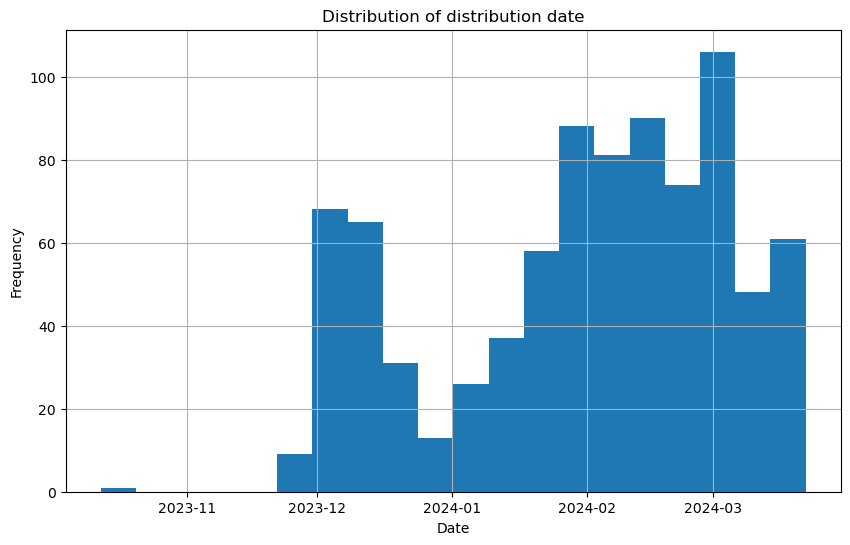

In [7]:
# Convert 'distributionDate' to datetime format
df['distributionDate'] = pd.to_datetime(df['distributionDate'])

# Plot distribution of 'distributionDate'
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
df['distributionDate'].hist(bins=20)  # Adjust number of bins as needed
plt.title(f'Distribution of distribution date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

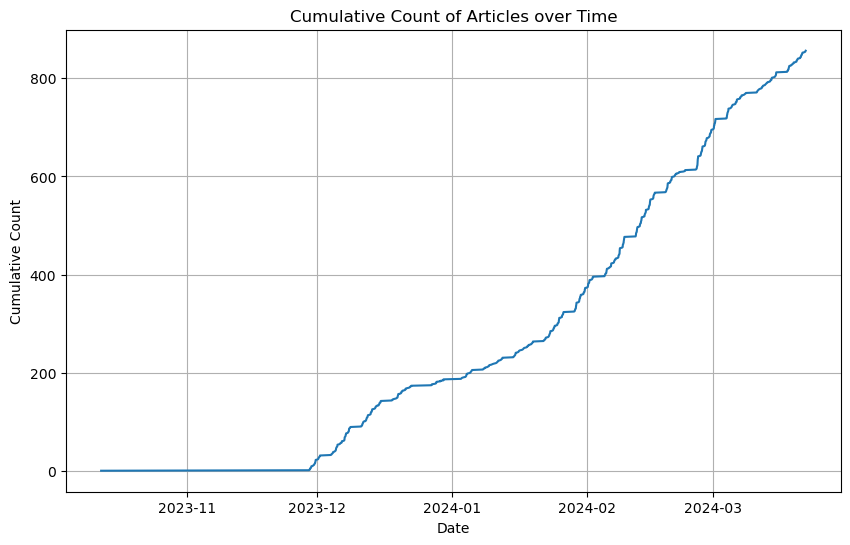

In [8]:
# Convert 'distributionDate' to datetime format
filtered = df[df['publicationTypeName'] == 'Baer Insight Fixed Income Research']
df['distributionDate'] = pd.to_datetime(df['distributionDate'])

# Sort the DataFrame by 'distributionDate' in ascending order
df = df.sort_values(by='distributionDate')

# Calculate the cumulative count of articles by date
cumulative_counts = df.groupby('distributionDate').size().cumsum()

# Plot cumulative count of articles over time
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(cumulative_counts.index, cumulative_counts.values)
plt.title('Cumulative Count of Articles over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


/var/folders/1s/dk_9w2pn68s9kwvxnqxs9pf00000gn/T/ipykernel_75178/2353190865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['publicationDateTime'] = pd.to_datetime(filtered['publicationDateTime'])


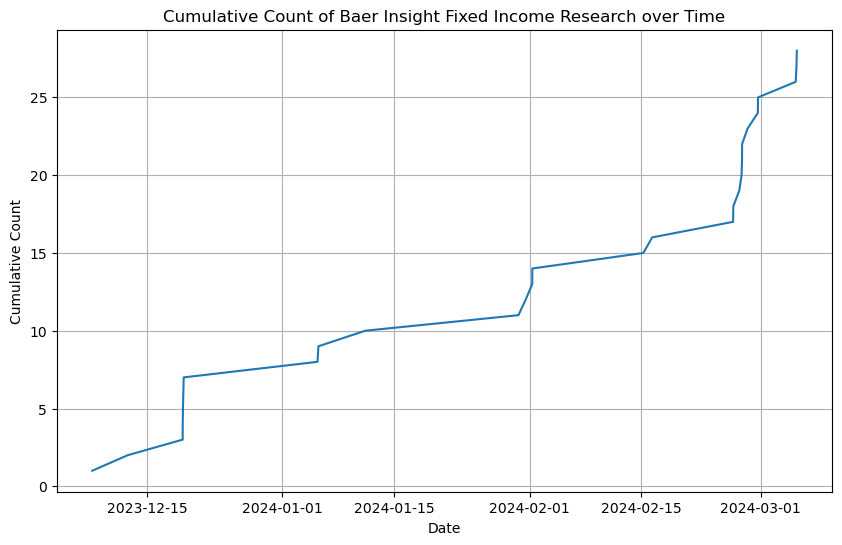

In [9]:
filtered = df[df['publicationTypeName'] == 'Baer Insight Fixed Income Research']
filtered['publicationDateTime'] = pd.to_datetime(filtered['publicationDateTime'])

# Sort the DataFrame by 'distributionDate' in ascending order
filtered = filtered.sort_values(by='publicationDateTime')

# Calculate the cumulative count of articles by date
cumulative_counts = filtered.groupby('publicationDateTime').size().cumsum()

# Plot cumulative count of articles over time
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(cumulative_counts.index, cumulative_counts.values)
plt.title('Cumulative Count of Baer Insight Fixed Income Research over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()

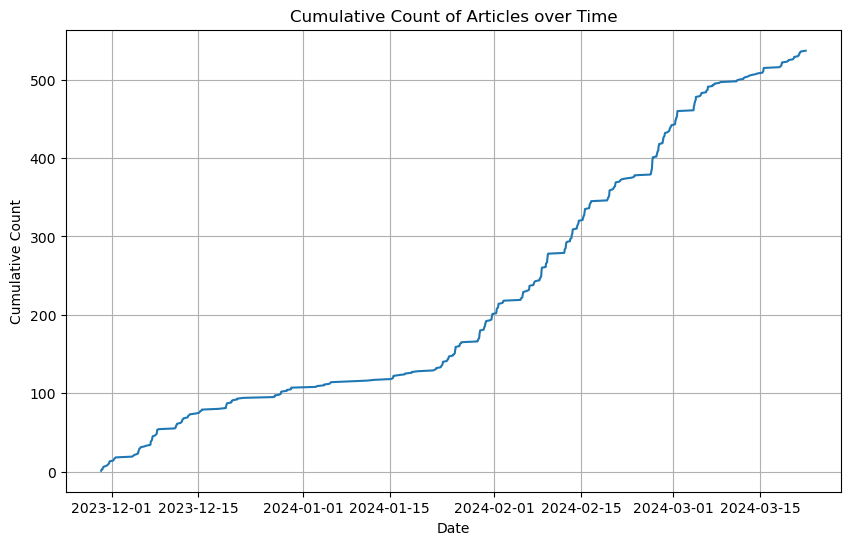

In [10]:
# Convert 'distributionDate' to datetime format
df['publicationDateTime'] = pd.to_datetime(df['publicationDateTime'])

# Sort the DataFrame by 'distributionDate' in ascending order
df = df.sort_values(by='publicationDateTime')

# Calculate the cumulative count of articles by date
cumulative_counts = df.groupby('publicationDateTime').size().cumsum()

# Plot cumulative count of articles over time
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(cumulative_counts.index, cumulative_counts.values)
plt.title('Cumulative Count of Articles over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


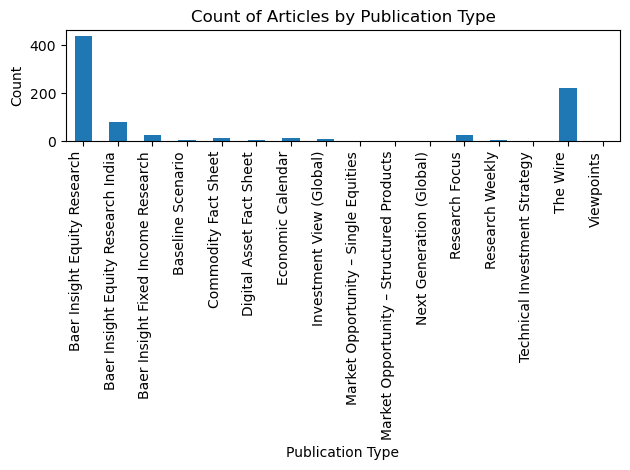

In [11]:
# Grouping the DataFrame by 'publicationTypeName' and counting the articles in each group
publication_type_counts = df.groupby('publicationTypeName').size().reset_index(name='count')

# Plotting the count of articles as a bar chart
publication_type_counts.plot(kind='bar', x='publicationTypeName', y='count', legend=None)
plt.xlabel('Publication Type')
plt.ylabel('Count')
plt.title('Count of Articles by Publication Type')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

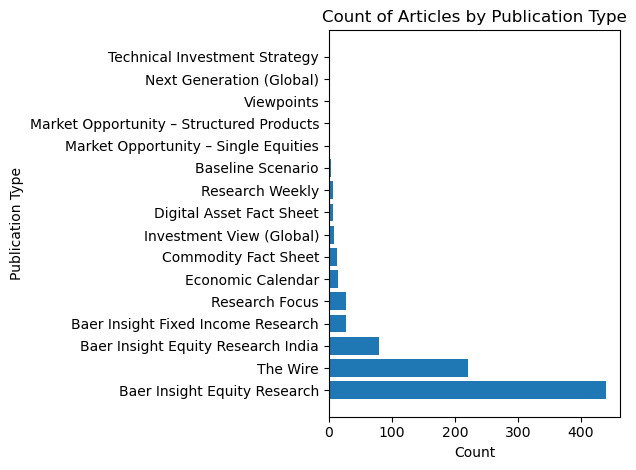

In [12]:
# Grouping the DataFrame by 'publicationTypeName' and counting the articles in each group
publication_type_counts = df.groupby('publicationTypeName').size().reset_index(name='count')

# Sorting the DataFrame by count in descending order
publication_type_counts = publication_type_counts.sort_values(by='count', ascending=False)

# Plotting the count of articles as a horizontal bar chart
plt.barh(publication_type_counts['publicationTypeName'], publication_type_counts['count'])
plt.xlabel('Count')
plt.ylabel('Publication Type')
plt.title('Count of Articles by Publication Type')

# Adding a legend for long labels
#plt.legend(['Count'], loc='upper right')

plt.tight_layout()
plt.show()

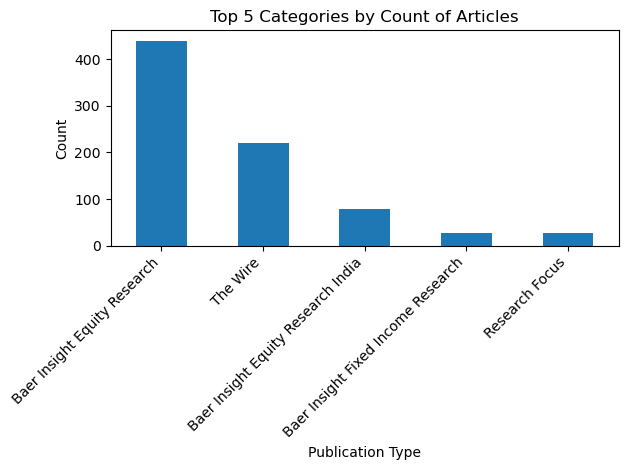

In [13]:
# Selecting only the top 5 categories
publication_type_counts_sorted = publication_type_counts.sort_values(by='count', ascending=False)
top_5_categories = publication_type_counts_sorted.head(5)

# Plotting the count of articles for the top 5 categories as a bar chart
top_5_categories.plot(kind='bar', x='publicationTypeName', y='count', legend=None)
plt.xlabel('Publication Type')
plt.ylabel('Count')
plt.title('Top 5 Categories by Count of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

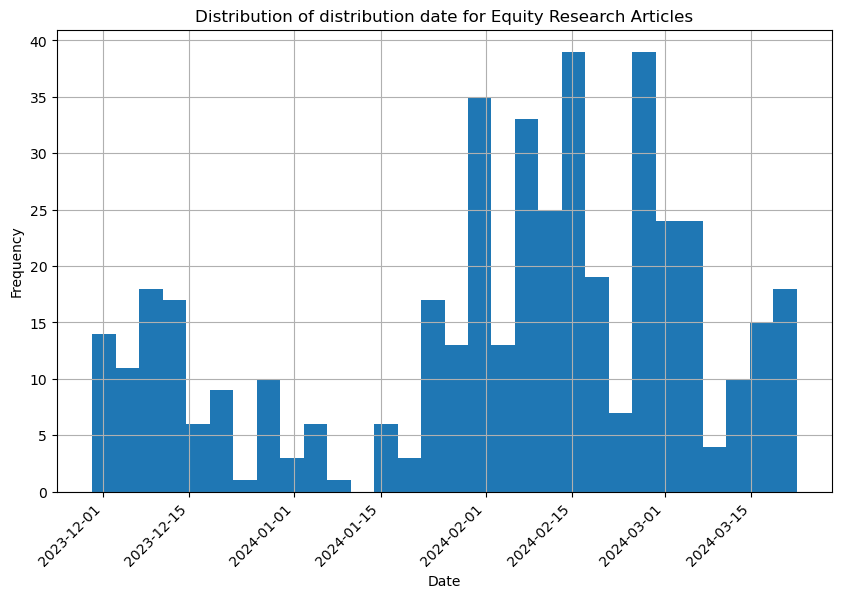

In [14]:
df['distributionDate'] = pd.to_datetime(df['distributionDate'])
# Plot distribution of 'distributionDate'
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
df[df['publicationTypeName'] == 'Baer Insight Equity Research']['distributionDate'].hist(bins=30)  # Adjust number of bins as needed
plt.title(f'Distribution of distribution date for Equity Research Articles')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# Grouping the DataFrame by 'sector' and counting the articles in each group
asset_type_counts = df.groupby('sector').size().reset_index(name='count')

# Sorting the DataFrame by count in descending order
asset_type_counts = asset_type_counts.sort_values(by='count', ascending=False)

# Plotting the count of articles as a horizontal bar chart
plt.barh(asset_type_counts['sector'], asset_type_counts['count'])
plt.xlabel('Count')
plt.ylabel('Asset Type')
plt.title('Count of Articles by Asset Type')

# Adding a legend for long labels
#plt.legend(['Count'], loc='upper right')

plt.tight_layout()
plt.show()

KeyError: 'sector'

In [16]:
# Sorting the DataFrame by count in descending order and selecting the top 5
top_asset_types = asset_type_counts.sort_values(by='count', ascending=False).head(5)

# Plotting the count of articles as a horizontal bar chart
plt.barh(top_asset_types['assetClasses'], top_asset_types['count'])
plt.xlabel('Count')
plt.ylabel('Asset Type')
plt.title('Count of Articles by Asset Type')

# Adding a legend for long labels
#plt.legend(['Count'], loc='upper right')

plt.tight_layout()
plt.show()

NameError: name 'asset_type_counts' is not defined

In [ ]:
# Grouping the DataFrame by 'sector' and counting the articles in each group
sector_type_counts = df.groupby('sectors').size().reset_index(name='count')

sector_type_counts_sorted = sector_type_counts.sort_values(by='count', ascending=False)
top_categories = sector_type_counts_sorted.head(20)

# Plotting the count of articles as a horizontal bar chart
plt.barh(top_categories['sectors'], top_categories['count'])
plt.xlabel('Count')
plt.ylabel('Sector Type')
plt.title('Top Counts of Articles by Sector Type')

# Adding a legend for long labels
#plt.legend(['Count'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Grouping the DataFrame by 'countries' and counting the articles in each group
countries_type_counts = df.groupby('countries').size().reset_index(name='count')

countries_type_counts_sorted = countries_type_counts.sort_values(by='count', ascending=False)
top_categories = countries_type_counts_sorted.head(15)

# Plotting the count of articles as a horizontal bar chart
plt.barh(top_categories['countries'], top_categories['count'])
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('Top Counts of Articles by Countries')

# Adding a legend for long labels
#plt.legend(['Count'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# This is a python script that gets all of the documents from the BJB Research via API
__author__ = 'Alvin Leung'
__version__ = 'v1.0'

import os
import base64

def base_64_to_pdf(x):
    # Ensure the directory exists
    path = x.publicationTypeName
    os.makedirs(path, exist_ok=True)
    
    # Construct the file name
    name = f'{x.publicationTitle}_{x.publicationDateTime}.pdf'
    file_path = os.path.join(path, name)
    
    # Decode and save the PDF
    with open(file_path, "wb") as f:
        f.write(base64.b64decode(x.content))
    return